# W=3 плоская

In [205]:
import os
import re
import pandas as pd
import numpy as np

In [206]:
Nups, Ndowns, Es, Ls = [], [], [], []
with open('/Users/i.pile/Documents/supercomp/itensor_trimers/W3_trimers.txt') as f:
    for line in f:
        Nups.append(int(re.search(r'(?<=Nup= )\d+',line).group()))
        Ndowns.append(int(re.search(r'(?<=Ndown= )\d+',line).group()))
        Es.append(float(re.search(r'(?<=E = ).+',line).group()))
        

In [207]:
df_W3 = pd.DataFrame({'Nup' : Nups, 
              'Ndown': Ndowns,
              'E' : Es,
              'L' : sorted([50,60,70,80,90,100,150,200,250,300]*3)})

In [181]:
def aggr(x):
    return 2*min(x) - sum(x)


In [208]:
df_W3['1/L'] = 1/df_W3['L']

In [209]:
import matplotlib.pyplot as plt

In [220]:
def approx(dataframe):
    """
    Подгоняем параболой
    """
    fitted = dataframe[['1/L', 'E']].groupby('1/L').agg(aggr).reset_index()
    x= fitted['1/L']
    y= fitted['E']
    coeffs = np.polyfit(x,y,2)
    return x, y, coeffs

def drawer(x,y,coeffs, name, color):
    plt.plot(x,y,'o',c = color, label = name)
    plt.plot(np.arange(0,0.02125,0.00125), 
             list(map(lambda x: coeffs[0]*x**2 + coeffs[1]*x + coeffs[2], np.arange(0,0.02125,0.00125))), 
             '-',
             c = color)
    plt.legend()

<IPython.core.display.Javascript object>


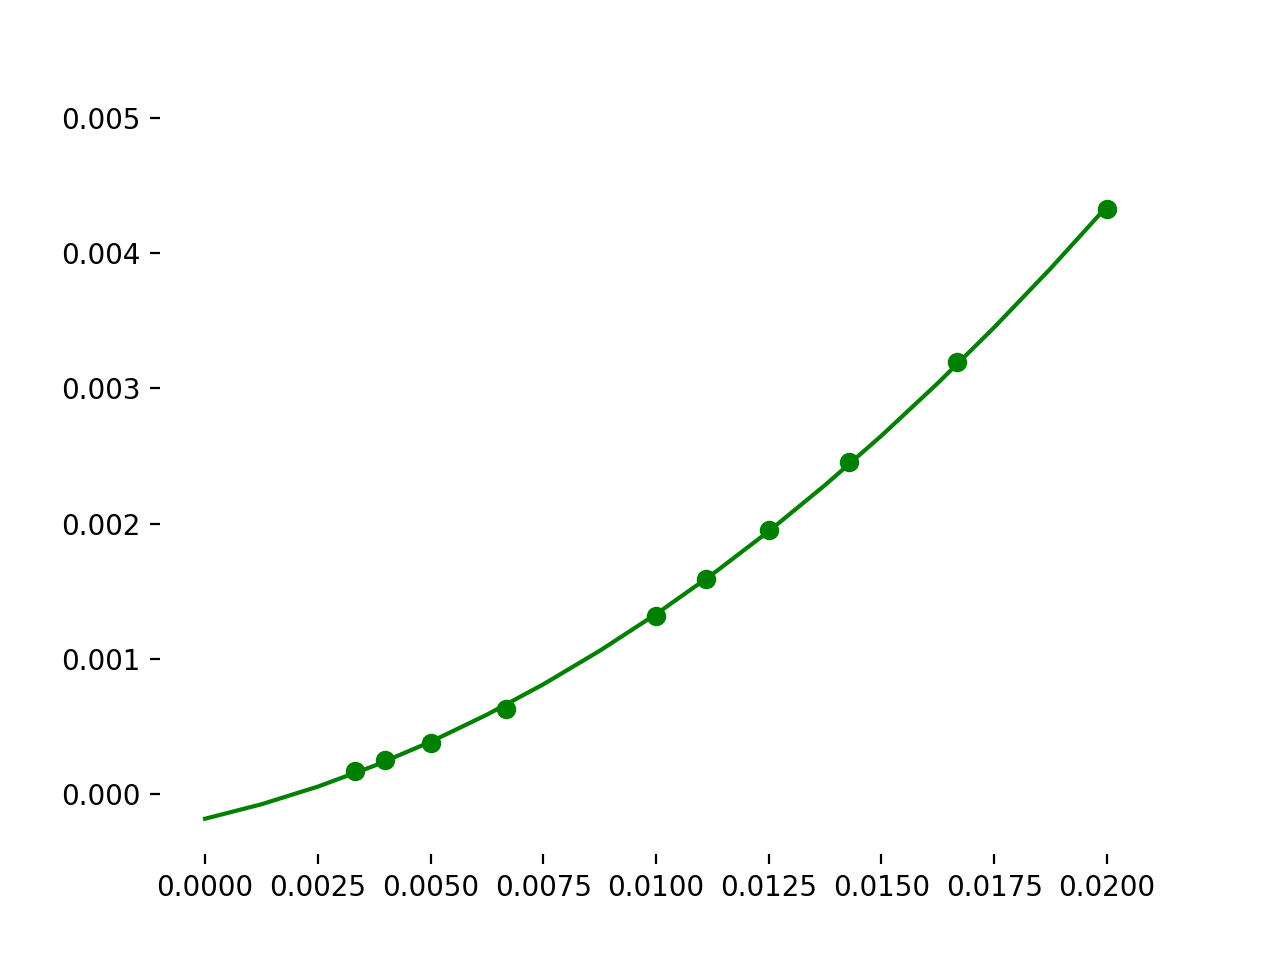

In [228]:
%matplotlib notebook
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 3 тоблерон

In [222]:
def load_df(path):
    Nups, Ndowns, Es, Ls = [], [], [], []
    with open(path) as f:
        for line in f:
            Nups.append(int(re.search(r'(?<=Nup= )\d+',line).group()))
            Ndowns.append(int(re.search(r'(?<=Ndown= )\d+',line).group()))
            Es.append(float(re.search(r'(?<=E = ).+',line).group()))
            Ls.append(float(re.search(r'(?<=L = )\d+',line).group()))
    df = pd.DataFrame({'Nup' : Nups, 
                       'Ndown': Ndowns,
                       'E' : Es,
                       'L' : Ls})
    df['1/L'] = 1/df['L']
    
    return df

        

<IPython.core.display.Javascript object>


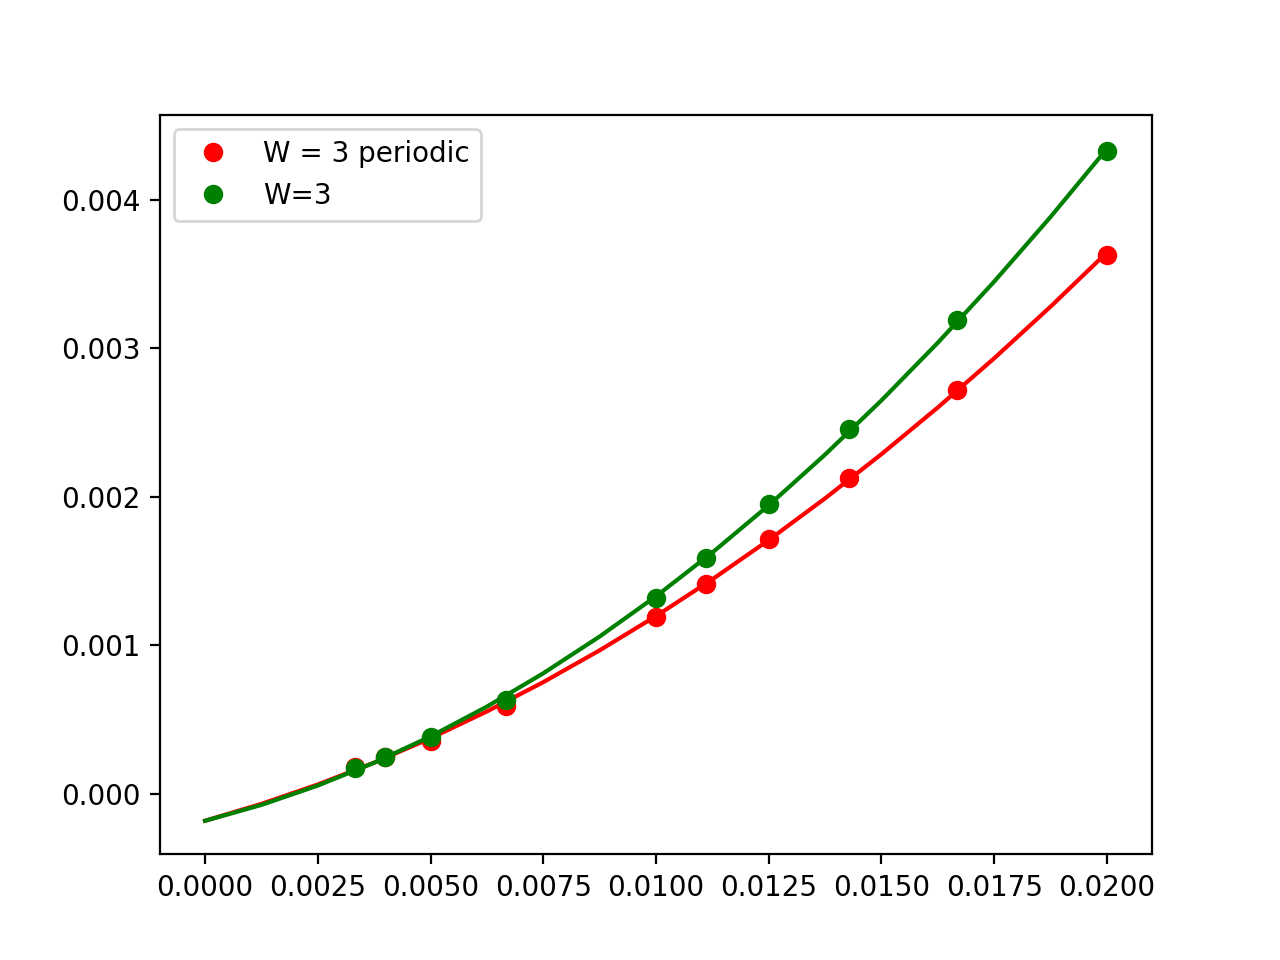

In [227]:
%matplotlib notebook
df_toblerone = load_df('/Users/i.pile/Documents/supercomp/itensor_trimers/W3_trimers_toblerone.txt')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 4

<IPython.core.display.Javascript object>


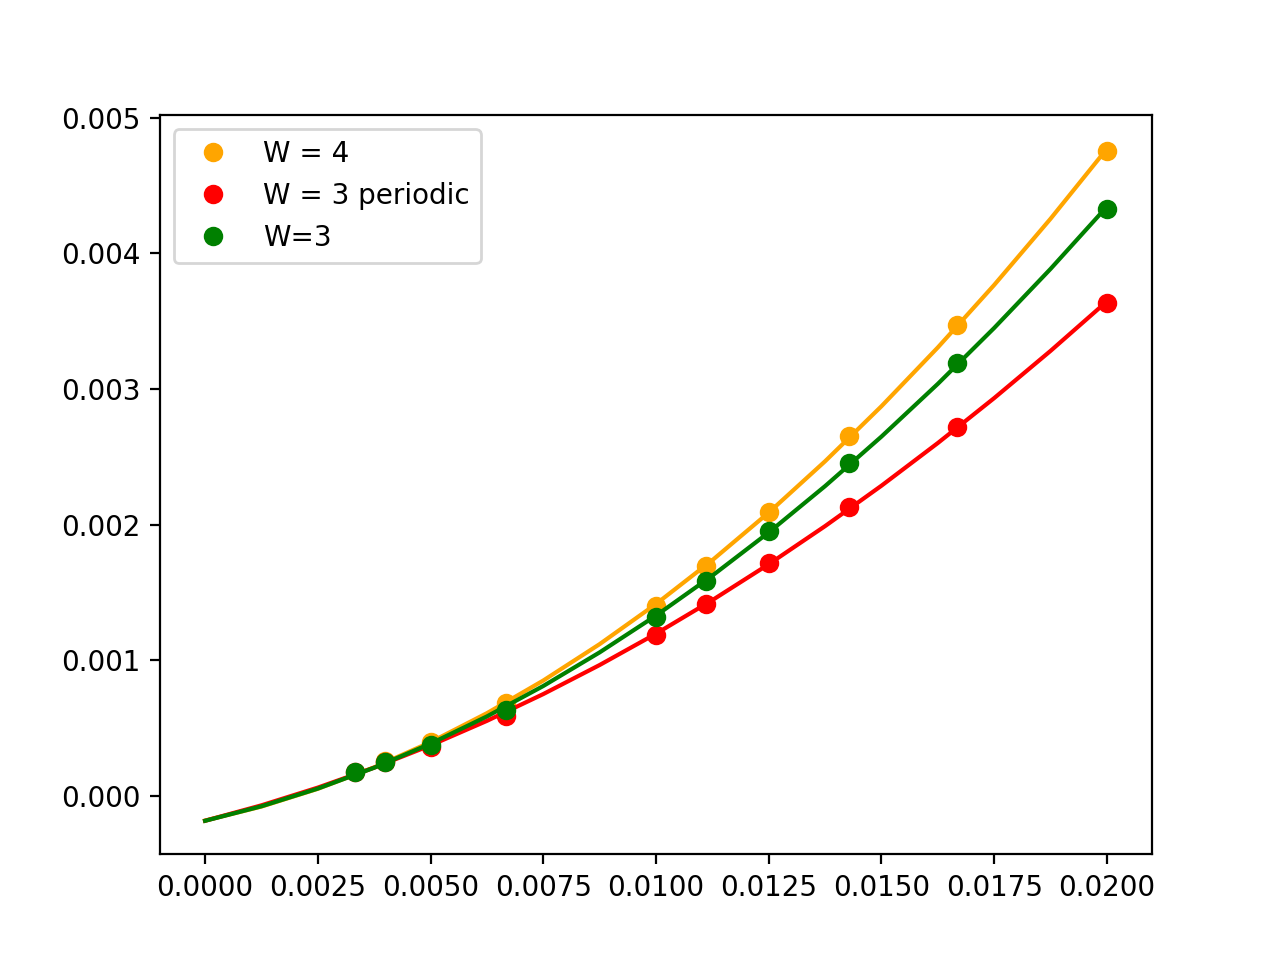

In [231]:
%matplotlib notebook
df_W4 = load_df('/Users/i.pile/Documents/supercomp/itensor_trimers/W4_trimers.txt')
x, y, coeffs = approx(df_W4)
drawer(x, y, coeffs, 'W = 4', 'orange')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 4 периодические условия

<IPython.core.display.Javascript object>


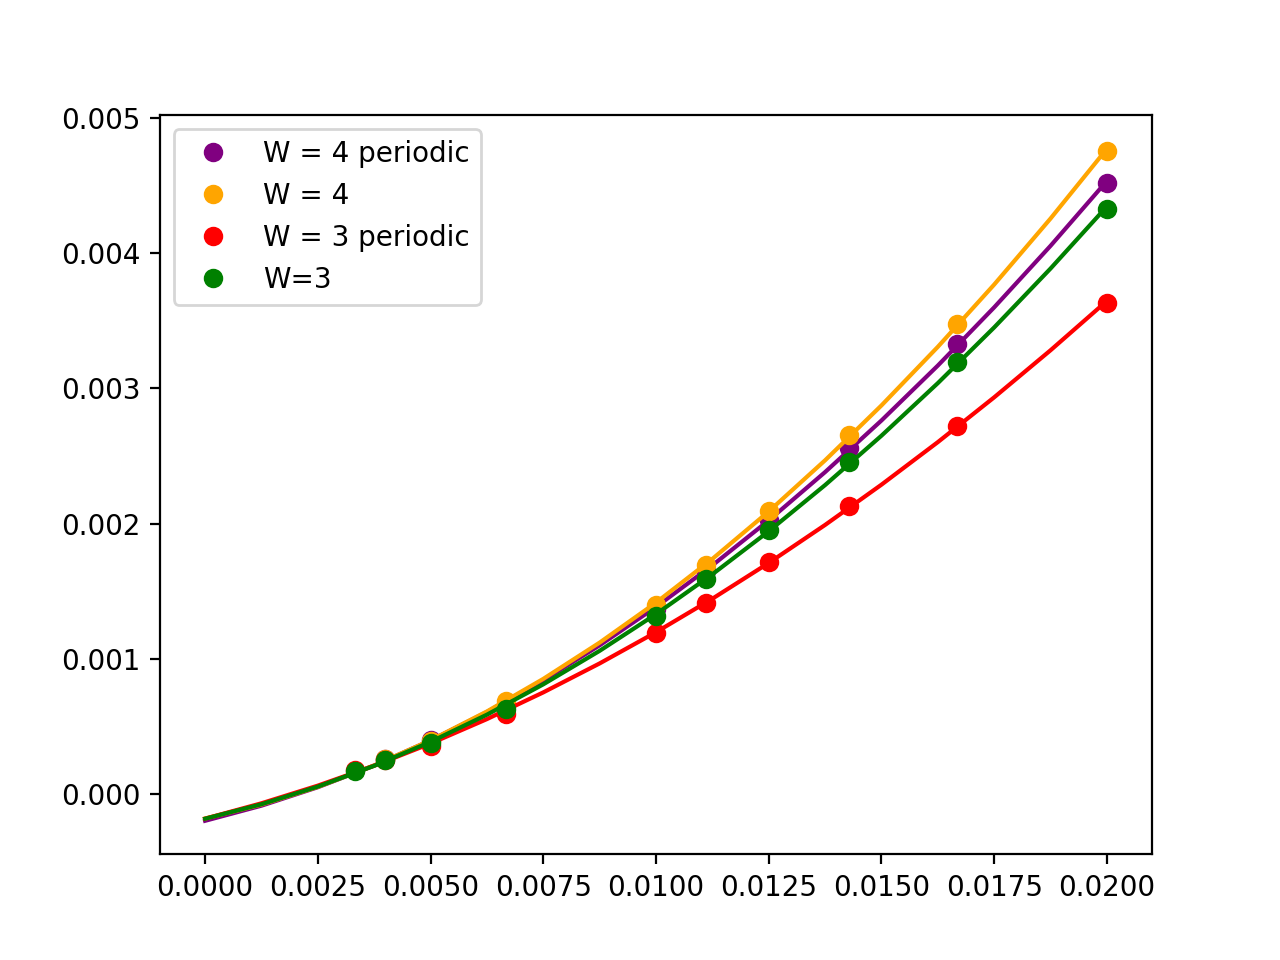

In [237]:
%matplotlib notebook
df_W4_periodic = load_df('/Users/i.pile/Documents/supercomp/itensor_trimers/W4_trimers_periodic.txt')
x, y, coeffs = approx(df_W4_periodic)
drawer(x, y, coeffs, 'W = 4 periodic', 'purple')
x, y, coeffs = approx(df_W4)
drawer(x, y, coeffs, 'W = 4', 'orange')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')

# W = 5 

In [242]:
df_W5 = load_df('/Users/i.pile/Documents/supercomp/itensor_trimers/W5_trimers.txt')
df_W5 = df_W5.sort_values(by=['L','Nup','Ndown'], ascending = [True, False, False])
df_W5

,Nup,Ndown,E,L,1/L
0,2,1,-12.996971,50.0,0.020000
1,1,1,-9.273803,50.0,0.020000
2,1,0,-3.728257,50.0,0.020000
3,2,1,-12.999884,60.0,0.016667
4,1,1,-9.274172,60.0,0.016667
5,1,0,-3.729399,60.0,0.016667
6,2,1,-13.001691,70.0,0.014286
7,1,1,-9.274395,70.0,0.014286
8,1,0,-3.730093,70.0,0.014286
9,2,1,-13.002891,80.0,0.012500


<IPython.core.display.Javascript object>


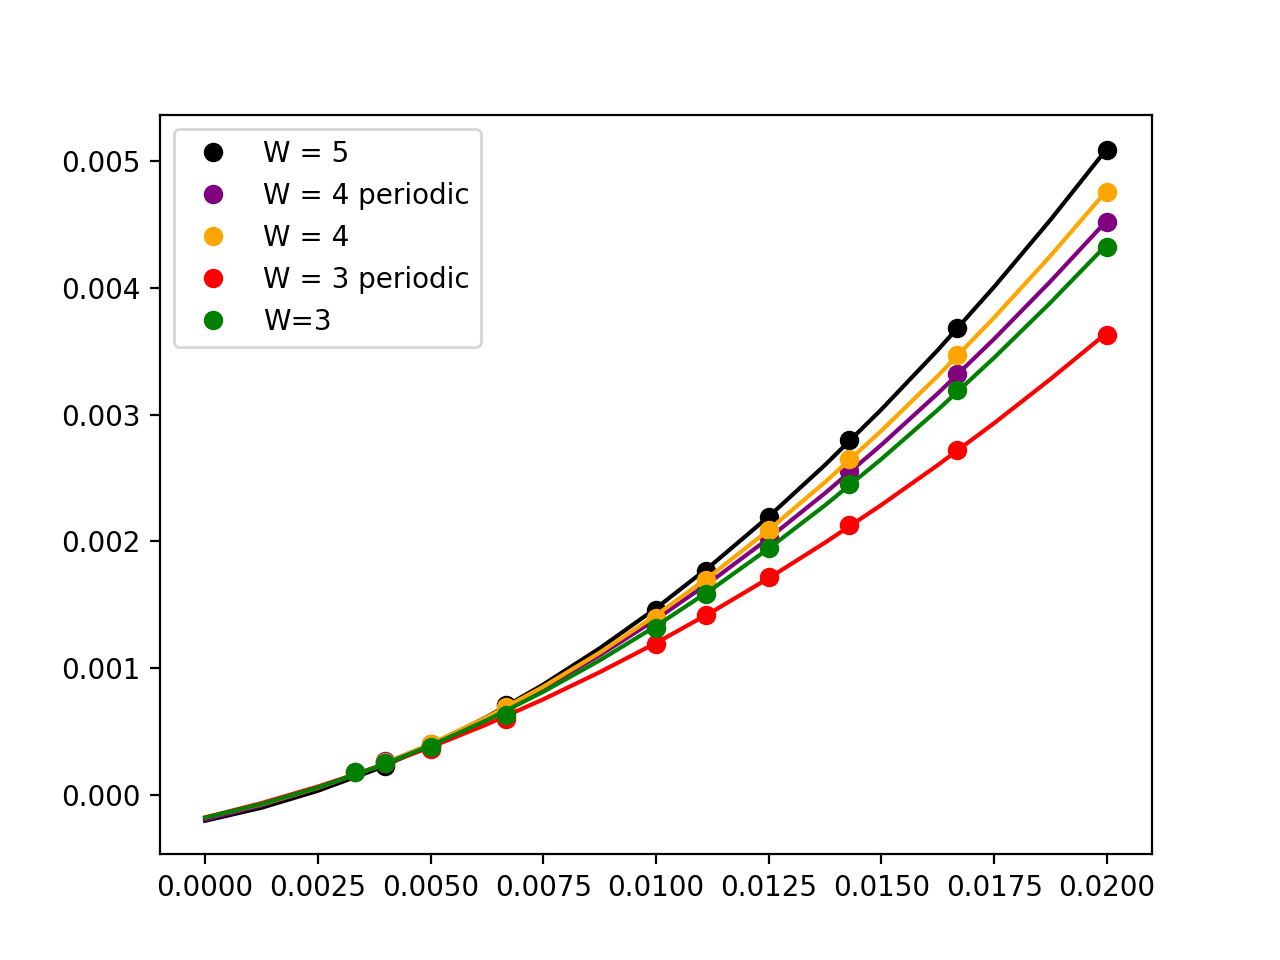

In [246]:
%matplotlib notebook
df_W5 = load_df('/Users/i.pile/Documents/supercomp/itensor_trimers/W5_trimers.txt')
df_W5 = df_W5.sort_values(by=['L','Nup','Ndown'], ascending = [True, False, False])
x, y, coeffs = approx(df_W5)
drawer(x, y, coeffs, 'W = 5', 'black')
x, y, coeffs = approx(df_W4_periodic)
drawer(x, y, coeffs, 'W = 4 periodic', 'purple')
x, y, coeffs = approx(df_W4)
drawer(x, y, coeffs, 'W = 4', 'orange')
x, y, coeffs = approx(df_toblerone)
drawer(x, y, coeffs, 'W = 3 periodic', 'red')
x, y, coeffs = approx(df_W3)
drawer(x, y, coeffs, 'W=3', 'green')